<!--TABLE OF CONTENTS-->
# Table of Contents:
- [Week 22: Classification](#Week-22:-Classification)
- [1.0 Loading Data](#1.0-Loading-Data)
  - [1.1 Loading Main Dataset](#1.1-Loading-Main-Dataset)
  - [1.2 Loading Additional Datasets](#1.2-Loading-Additional-Datasets)
- [2.0 Data Processing](#2.0-Data-Processing)
  - [2.1 Combining the secondary datasets](#2.1-Combining-the-secondary-datasets)
  - [2.2 Combining the Main dataset with the secondary datasets](#2.2-Combining-the-Main-dataset-with-the-secondary-datasets)
- [3 Feature Engineering](#3-Feature-Engineering)
  - [Creating Dummy Variables](#Creating-Dummy-Variables)
- [4.0 Model Training and Testing](#4.0-Model-Training-and-Testing)
  - [4.1 Creating the Target for Prediction](#4.1-Creating-the-Target-for-Prediction)
  - [4.2 Specifying the Features and Splitting Training Data](#4.2-Specifying-the-Features-and-Splitting-Training-Data)
  - [4.3 Logistic Regression](#4.3-Logistic-Regression)
  - [4.1 Random Tree Forest](#4.1-Random-Tree-Forest)
  - [4.3 Your Model of Choice](#4.3-Your-Model-of-Choice)
    - [4.3.1 Model A](#4.3.1-Model-A)
    - [4.3.2. Model B](#4.3.2.-Model-B)
- [Extra Learning: Adjusting Prediction with Decision Threshold](#Extra-Learning:-Adjusting-Prediction-with-Decision-Threshold)
- [Extra Learning: T-Test](#Extra-Learning:-T-Test)
- [Appendix: Template Codes for "Standardizing the Features"](#Appendix:-Template-Codes-for-"Standardizing-the-Features")
  - [When it's benefiical to use 'StandardScaler'](#When-it's-benefiical-to-use-'StandardScaler')
  - [Example Codes](#Example-Codes)
  - [Demystifying "Standard Scaler "](#Demystifying-"Standard-Scaler-")

# Week 22: Classification

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Settings for Matplotlib (& Seaborn)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Import libraries for charting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of charts
plt.rc('figure', figsize=(16,9))
plt.style.use('fivethirtyeight')
sns.set_context(context={'figure.figsize': (16,9)})

# 1.0 Loading Data

## 1.1 Loading Main Dataset

> Q: Load the data from **00_raw_data** folder

In [3]:
df = pd.read_csv('../00_raw_data/df_hdb_resale_info_distance.csv')

> Q: Show 15 random records from data

In [4]:
df.sample(15)

,Tranc_YearMonth,Tranc_Year,Tranc_Month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,...,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls
3185,2015-03,2015,3,PUNGGOL,4 ROOM,132,EDGEDALE PLAINS,10 TO 12,91.0,Premium Apartment,...,281.872267,1.0,2.0,6.0,3682.080132,0.0,0.0,0.0,40,0
140551,2012-07,2012,7,CHOA CHU KANG,5 ROOM,549,CHOA CHU KANG ST 52,04 TO 06,121.0,Improved,...,136.189509,1.0,4.0,7.0,3702.578494,0.0,0.0,0.0,28,45
11390,2015-08,2015,8,TOA PAYOH,3 ROOM,85B,LOR 4 TOA PAYOH,16 TO 18,78.0,Improved,...,477.847894,1.0,1.0,6.0,279.135213,3.0,6.0,8.0,28,32
116985,2020-10,2020,10,BUKIT MERAH,2 ROOM,127A,KIM TIAN RD,07 TO 09,47.0,Model A,...,565.639522,0.0,1.0,7.0,438.678114,2.0,5.0,18.0,83,259
173049,2014-05,2014,5,QUEENSTOWN,3 ROOM,3,DOVER RD,07 TO 09,73.0,Improved,...,693.170026,0.0,2.0,4.0,1038.967861,0.0,0.0,7.0,72,158
177982,2014-09,2014,9,GEYLANG,3 ROOM,52,SIMS PL,10 TO 12,65.0,Improved,...,648.611953,0.0,1.0,9.0,167.337921,1.0,4.0,13.0,66,78
106476,2020-03,2020,3,YISHUN,3 ROOM,333D,YISHUN ST 31,01 TO 03,67.0,Model A,...,522.130454,0.0,1.0,3.0,805.073510,0.0,1.0,1.0,45,0
7386,2015-06,2015,6,CENTRAL AREA,4 ROOM,1D,CANTONMENT RD,40 TO 42,96.0,Type S1,...,339.545830,1.0,3.0,11.0,196.057178,1.0,7.0,11.0,52,108
138208,2012-06,2012,6,BUKIT BATOK,3 ROOM,408,BT BATOK WEST AVE 4,10 TO 12,68.0,New Generation,...,1397.071516,0.0,0.0,4.0,2500.623390,0.0,0.0,0.0,60,87
98468,2019-11,2019,11,QUEENSTOWN,3 ROOM,27,GHIM MOH LINK,13 TO 15,67.0,Model A,...,381.199292,2.0,2.0,3.0,463.079319,1.0,2.0,7.0,72,158


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185968 entries, 0 to 185967
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Tranc_YearMonth          185968 non-null  object 
 1   Tranc_Year               185968 non-null  int64  
 2   Tranc_Month              185968 non-null  int64  
 3   town                     185968 non-null  object 
 4   flat_type                185968 non-null  object 
 5   block                    185968 non-null  object 
 6   street_name              185968 non-null  object 
 7   storey_range             185968 non-null  object 
 8   floor_area_sqm           185968 non-null  float64
 9   flat_model               185968 non-null  object 
 10  lease_commence_date      185968 non-null  int64  
 11  resale_price             185968 non-null  float64
 12  floor_area_sqft          185968 non-null  float64
 13  price_per_sqft           185968 non-null  float64
 14  flat

## 1.2 Loading Additional Datasets


🔷**TASK**

> Read the csv file **hdb_flat_info_by_address** into a variable **df_hdb_info**

In [6]:
df_hdb_info = pd.read_csv("../00_raw_data/hdb_flat_info_by_address.csv")

In [7]:
df_hdb_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9175 entries, 0 to 9174
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   address         9175 non-null   object 
 1   max_floor_lvl   9175 non-null   int64  
 2   year_completed  9175 non-null   int64  
 3   residential     9175 non-null   object 
 4   commercial      9175 non-null   object 
 5   postal          9175 non-null   object 
 6   Latitude        9175 non-null   float64
 7   Longitude       9175 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 573.6+ KB


In [8]:
df_hdb_info.head(5)

,address,max_floor_lvl,year_completed,residential,commercial,postal,Latitude,Longitude
0,"174, ANG MO KIO AVE 4",11,1980,Y,N,560174,1.375097,103.837619
1,"541, ANG MO KIO AVE 10",8,1979,Y,N,560541,1.373922,103.855621
2,"163, ANG MO KIO AVE 4",4,1981,Y,Y,560163,1.373549,103.838177
3,"446, ANG MO KIO AVE 10",4,1979,Y,Y,560446,1.367761,103.855357
4,"557, ANG MO KIO AVE 10",13,1979,Y,N,560557,1.371626,103.857736


In [13]:
df_hdb_info['address'].nunique() == len(df_hdb_info)

True


🔷**TASK**

> Read the csv file **hdb_flat_type_sold_by_address** into a variable **df_hdb_sold**

In [9]:
df_hdb_sold = pd.read_csv("../00_raw_data/hdb_flat_type_sold_by_address.csv")

In [10]:
df_hdb_sold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82575 entries, 0 to 82574
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   address               82575 non-null  object
 1   flat_type_sold        82575 non-null  object
 2   flat_type_sold_count  82575 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.9+ MB


In [11]:
df_hdb_sold.head(15)

,address,flat_type_sold,flat_type_sold_count
0,"1, BEACH RD",1room_sold,0
1,"1, BEACH RD",2room_sold,1
2,"1, BEACH RD",3room_sold,138
3,"1, BEACH RD",4room_sold,1
4,"1, BEACH RD",5room_sold,2
5,"1, BEACH RD",exec_sold,0
6,"1, BEACH RD",multigen_sold,0
7,"1, BEACH RD",studio_apartment_sold,0
8,"1, BEACH RD",total_dwelling_units,142
9,"1, BEDOK STH AVE 1",1room_sold,0


# 2.0 Data Processing

## 2.1 Combining the secondary datasets


🔷**TASK**
> You want every row in **df_hdb_info** to have its corresponding information from the **df_hdb_sold**. <br>
> Every row in **df_hdb_info** is unique for the given **address**. <br>
> Merge all the columns from **df_hdb_sold** into **df_hdb_info**. <br>
> ![](_resources/merge_secondary_dataset.png) <br>
> The **df_hdb_info_full** should look like this <br>
> ![](_resources/df_info_full.png)

In [21]:
df_hdb_sold = df_hdb_sold.pivot('address', 'flat_type_sold', 'flat_type_sold_count')
df_hdb_sold = df_hdb_sold.reset_index()

In [26]:
df_hdb_info

,address,max_floor_lvl,year_completed,residential,commercial,postal,Latitude,Longitude
0,"174, ANG MO KIO AVE 4",11,1980,Y,N,560174,1.375097,103.837619
1,"541, ANG MO KIO AVE 10",8,1979,Y,N,560541,1.373922,103.855621
2,"163, ANG MO KIO AVE 4",4,1981,Y,Y,560163,1.373549,103.838177
3,"446, ANG MO KIO AVE 10",4,1979,Y,Y,560446,1.367761,103.855357
4,"557, ANG MO KIO AVE 10",13,1979,Y,N,560557,1.371626,103.857736
...,...,...,...,...,...,...,...,...
9170,"274A, COMPASSVALE BOW",18,2016,Y,N,541274,1.381554,103.890563
9171,"215A, COMPASSVALE DR",16,2016,Y,N,541215,1.389479,103.893279
9172,"217B, COMPASSVALE DR",16,2016,Y,N,542217,1.389280,103.894346
9173,"506C, YISHUN AVE 4",13,2016,Y,N,763506,1.415446,103.840456


In [25]:
df_hdb_info_full = df_hdb_info.merge(df_hdb_sold, 'left', 'address')
len(df_hdb_info) == len(df_hdb_info_full)

True

## 2.2 Combining the Main dataset with the secondary datasets


🔷**TASK**
> You want every row in **df** to have its corresponding information from the **df_hdb_info_full**. <br>
> Merge all the columns from **df_hdb_info_full** into **df**. <br>
> ![](_resources/merge_prime.png)

In [27]:
df = df.merge(df_hdb_info_full, 'left', 'address')

In [28]:
df

,Tranc_YearMonth,Tranc_Year,Tranc_Month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,...,Longitude,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,total_dwelling_units
0,2015-01,2015,1,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,...,103.837619,0,57,137,1,1,0,0,0,198
1,2015-01,2015,1,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,...,103.855621,0,0,165,21,3,2,0,0,191
2,2015-01,2015,1,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,...,103.838177,0,0,84,0,0,0,0,0,84
3,2015-01,2015,1,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,...,103.855357,0,0,23,0,0,0,0,0,23
4,2015-01,2015,1,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,...,103.857736,0,0,158,24,2,3,0,0,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185963,2014-12,2014,12,KALLANG/WHAMPOA,3 ROOM,2,ST. GEORGE'S RD,13 TO 15,59.0,Improved,...,103.860687,0,0,152,0,2,0,0,0,154
185964,2014-12,2014,12,KALLANG/WHAMPOA,3 ROOM,14,ST. GEORGE'S RD,10 TO 12,67.0,New Generation,...,103.862088,0,0,124,22,2,2,0,0,150
185965,2014-12,2014,12,KALLANG/WHAMPOA,3 ROOM,20,ST. GEORGE'S RD,10 TO 12,67.0,New Generation,...,103.862860,0,0,122,22,3,2,0,0,149
185966,2014-12,2014,12,KALLANG/WHAMPOA,4 ROOM,1,ST. GEORGE'S RD,10 TO 12,82.0,Improved,...,103.861631,0,0,0,154,0,0,0,0,154


# 3 Feature Engineering


🔷**TASK**
> Create a new column **age_approx**, by calculating years between 2022 and the **lease_commence_date**

In [29]:
df['age_approx'] = 2022 - df['lease_commence_date']


🔷**TASK**
> Createa a new column **storey_range_midpoint** which is the middle point the column **storey_range**

In [30]:
def get_midpoint(row):
    two_parts = row['storey_range'].split(' TO ')
    low = int(two_parts[0])
    high = int(two_parts[1])
    mid = (high + low)/2
    return int(mid)


df['storey_range_midpoint'] = df.apply(get_midpoint, axis=1)

In [31]:
df['storey_range']

0         07 TO 09
1         01 TO 03
2         01 TO 03
3         01 TO 03
4         07 TO 09
            ...   
185963    13 TO 15
185964    10 TO 12
185965    10 TO 12
185966    10 TO 12
185967    04 TO 06
Name: storey_range, Length: 185968, dtype: object

In [32]:
df['storey_range_midpoint']

0          8
1          2
2          2
3          2
4          8
          ..
185963    14
185964    11
185965    11
185966    11
185967     5
Name: storey_range_midpoint, Length: 185968, dtype: int64


🔷**TASK**
> Create a new column **storey_relative**, of which the formula is **storey_range_midpoint** / **max_floor_lvl**. <br>
> This number will fall within 0 and 1. <br>
> Higher number representing higher floor in relative to the block the unit is located.

In [33]:
df['storey_relative'] = df['storey_range_midpoint'] / df['max_floor_lvl']

In [34]:
df['storey_relative'].describe()

count    185968.000000
mean          0.556846
std           0.283102
min           0.042553
25%           0.333333
50%           0.533333
75%           0.800000
max           1.500000
Name: storey_relative, dtype: float64

In [36]:
# Additional Code to set the "Ceiling"for the 'storey_relative' as 1
# You can also use the usual .apply(mycustomfunction, axis=1) pattern
# The line below is to show an alternative way of achieving that
df['storey_relative'] = df['storey_relative'].apply(lambda x: 1 if x > 1 else x)

<AxesSubplot:>

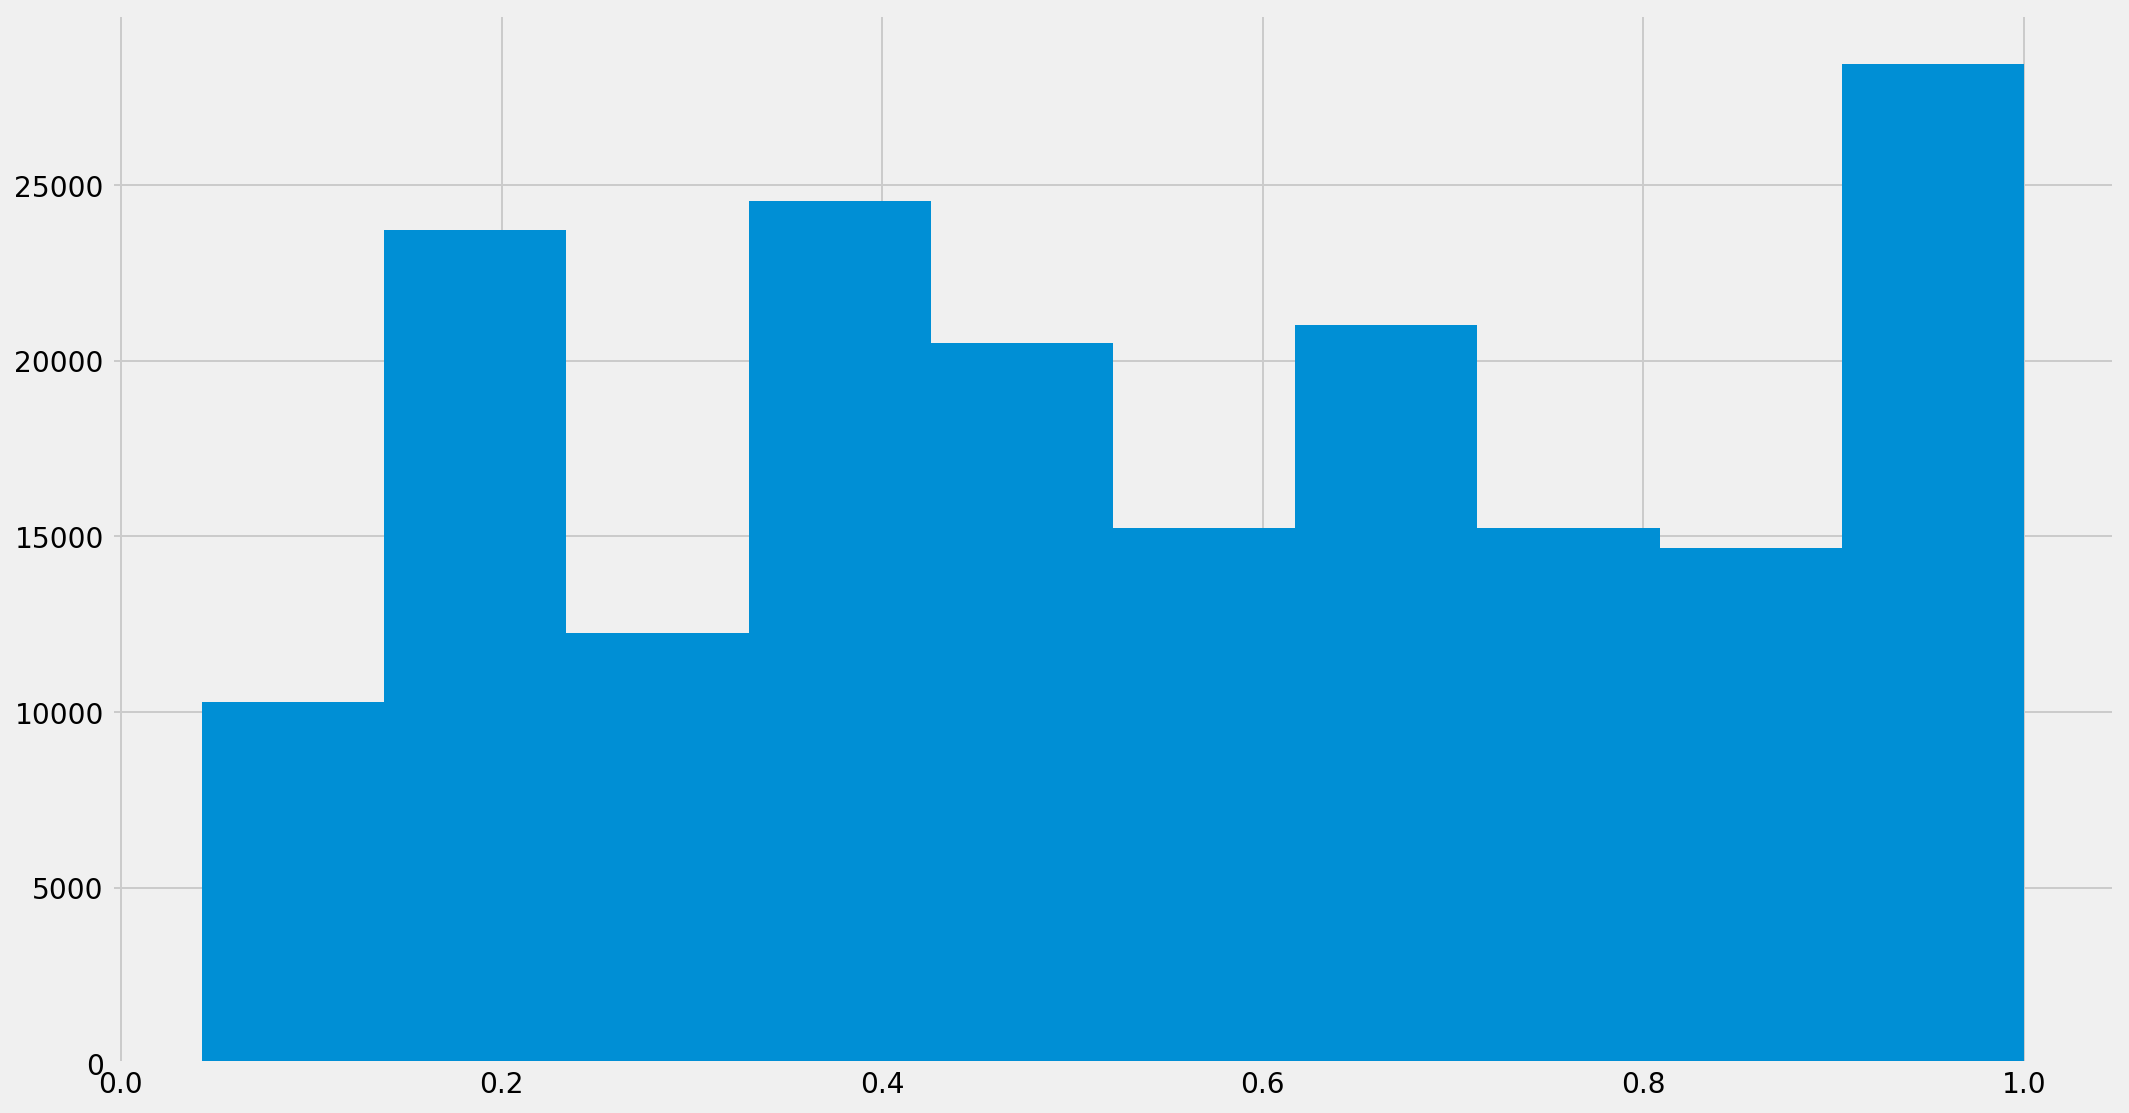

In [37]:
df['storey_relative'].hist()

## Creating Dummy Variables

In [38]:
features_category = [
    'town'
]

In [39]:
df['town']

0              ANG MO KIO
1              ANG MO KIO
2              ANG MO KIO
3              ANG MO KIO
4              ANG MO KIO
               ...       
185963    KALLANG/WHAMPOA
185964    KALLANG/WHAMPOA
185965    KALLANG/WHAMPOA
185966    KALLANG/WHAMPOA
185967           SENGKANG
Name: town, Length: 185968, dtype: object

In [40]:
# Create Dummies Variables for All Categorical Variables

df_dummies = pd.get_dummies(df[features_category], drop_first=True)

# Add the Dummies Variables to the main Data Frame
df = pd.concat([df, df_dummies], axis=1, sort=False)

In [41]:
df

,Tranc_YearMonth,Tranc_Year,Tranc_Month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,...,town_PASIR RIS,town_PUNGGOL,town_QUEENSTOWN,town_SEMBAWANG,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN
0,2015-01,2015,1,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,...,0,0,0,0,0,0,0,0,0,0
1,2015-01,2015,1,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,...,0,0,0,0,0,0,0,0,0,0
2,2015-01,2015,1,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,...,0,0,0,0,0,0,0,0,0,0
3,2015-01,2015,1,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,...,0,0,0,0,0,0,0,0,0,0
4,2015-01,2015,1,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185963,2014-12,2014,12,KALLANG/WHAMPOA,3 ROOM,2,ST. GEORGE'S RD,13 TO 15,59.0,Improved,...,0,0,0,0,0,0,0,0,0,0
185964,2014-12,2014,12,KALLANG/WHAMPOA,3 ROOM,14,ST. GEORGE'S RD,10 TO 12,67.0,New Generation,...,0,0,0,0,0,0,0,0,0,0
185965,2014-12,2014,12,KALLANG/WHAMPOA,3 ROOM,20,ST. GEORGE'S RD,10 TO 12,67.0,New Generation,...,0,0,0,0,0,0,0,0,0,0
185966,2014-12,2014,12,KALLANG/WHAMPOA,4 ROOM,1,ST. GEORGE'S RD,10 TO 12,82.0,Improved,...,0,0,0,0,0,0,0,0,0,0


# 4.0 Model Training and Testing

## 4.1 Creating the Target for Prediction

> Note that this part is solely created for creating the column that the model will predict. <br>
> You can have a glance, roughly get sense of what these codes do, and <br>
> *execute the codes without changing anything*.

In [44]:
# Original line in Notebook
df_avg_town_type = df.groupby(['town', 'flat_type']).resale_price.agg([np.mean, lambda x: np.quantile(x, .8)]).reset_index()

In [45]:
df_avg_town_type.columns = ['town', 'flat_type', 'price_avg', 'price_p80']

In [46]:
df = df.merge(df_avg_town_type, 'left', ['town', 'flat_type'])

In [47]:
df['price_above_average'] = df['resale_price'] > df['price_avg']
df['price_above_80percentile'] = df['resale_price'] > df['price_p80']

## 4.2 Specifying the Features and Splitting Training Data

In [49]:
from sklearn import model_selection
from sklearn import metrics

In [50]:
features_category = list(df_dummies.columns)

In [51]:
features_category

['town_BEDOK',
 'town_BISHAN',
 'town_BUKIT BATOK',
 'town_BUKIT MERAH',
 'town_BUKIT PANJANG',
 'town_BUKIT TIMAH',
 'town_CENTRAL AREA',
 'town_CHOA CHU KANG',
 'town_CLEMENTI',
 'town_GEYLANG',
 'town_HOUGANG',
 'town_JURONG EAST',
 'town_JURONG WEST',
 'town_KALLANG/WHAMPOA',
 'town_MARINE PARADE',
 'town_PASIR RIS',
 'town_PUNGGOL',
 'town_QUEENSTOWN',
 'town_SEMBAWANG',
 'town_SENGKANG',
 'town_SERANGOON',
 'town_TAMPINES',
 'town_TOA PAYOH',
 'town_WOODLANDS',
 'town_YISHUN']

In [54]:
features_numeric = [
    'Tranc_Year',
    'flat_type_numerized',
    'floor_area_sqm',
    'storey_relative',
    'age_approx',
    'Mall_Nearest_Distance',
    'Mall_Within_1km',
    'Hawker_Nearest_Distance',
    'Hawker_Within_1km'
]

In [57]:
df[features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185968 entries, 0 to 185967
Data columns (total 34 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Tranc_Year               185968 non-null  int64  
 1   flat_type_numerized      185968 non-null  int64  
 2   floor_area_sqm           185968 non-null  float64
 3   storey_relative          185968 non-null  float64
 4   age_approx               185968 non-null  int64  
 5   Mall_Nearest_Distance    185968 non-null  float64
 6   Mall_Within_1km          185968 non-null  float64
 7   Hawker_Nearest_Distance  185968 non-null  float64
 8   Hawker_Within_1km        185968 non-null  float64
 9   town_BEDOK               185968 non-null  uint8  
 10  town_BISHAN              185968 non-null  uint8  
 11  town_BUKIT BATOK         185968 non-null  uint8  
 12  town_BUKIT MERAH         185968 non-null  uint8  
 13  town_BUKIT PANJANG       185968 non-null  uint8  
 14  town

In [55]:
features = features_numeric + features_category

In [58]:
target = 'price_above_average'

In [59]:
# Keep 25% of the data for testing
# Set random_state=2020
x_train, x_test, y_train, y_test = model_selection.train_test_split(df[features], df[target], test_size=.25, random_state=2020)

## 4.3 Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression

> Q: Complete the following cell

In [62]:
model_logreg = LogisticRegression(max_iter=1000)

# Train the model
model_logreg.fit(x_train, y_train)

# Generate predictions based on the test data set
predictions = model_logreg.predict(x_test)



# Generate Precision of the model
print(metrics.precision_score(y_test, predictions))

# Generate Recall of the model
print(metrics.recall_score(y_test, predictions))

0.6579591402426048
0.5788439035806225


In [ ]:
# Precision
# 10,000 predictions from our model as positive (i.e. above average)

# 6,580 transctions are correctly predicted as above average

In [ ]:
# Recall
# 10,000 transactions truly above average

# 5,780 transctions are correctly predicted as above average

In [64]:
metrics.confusion_matrix(y_test, predictions)

array([[18698,  6429],
       [ 8998, 12367]], dtype=int64)

Text(70.66, 0.5, 'Actual Value')

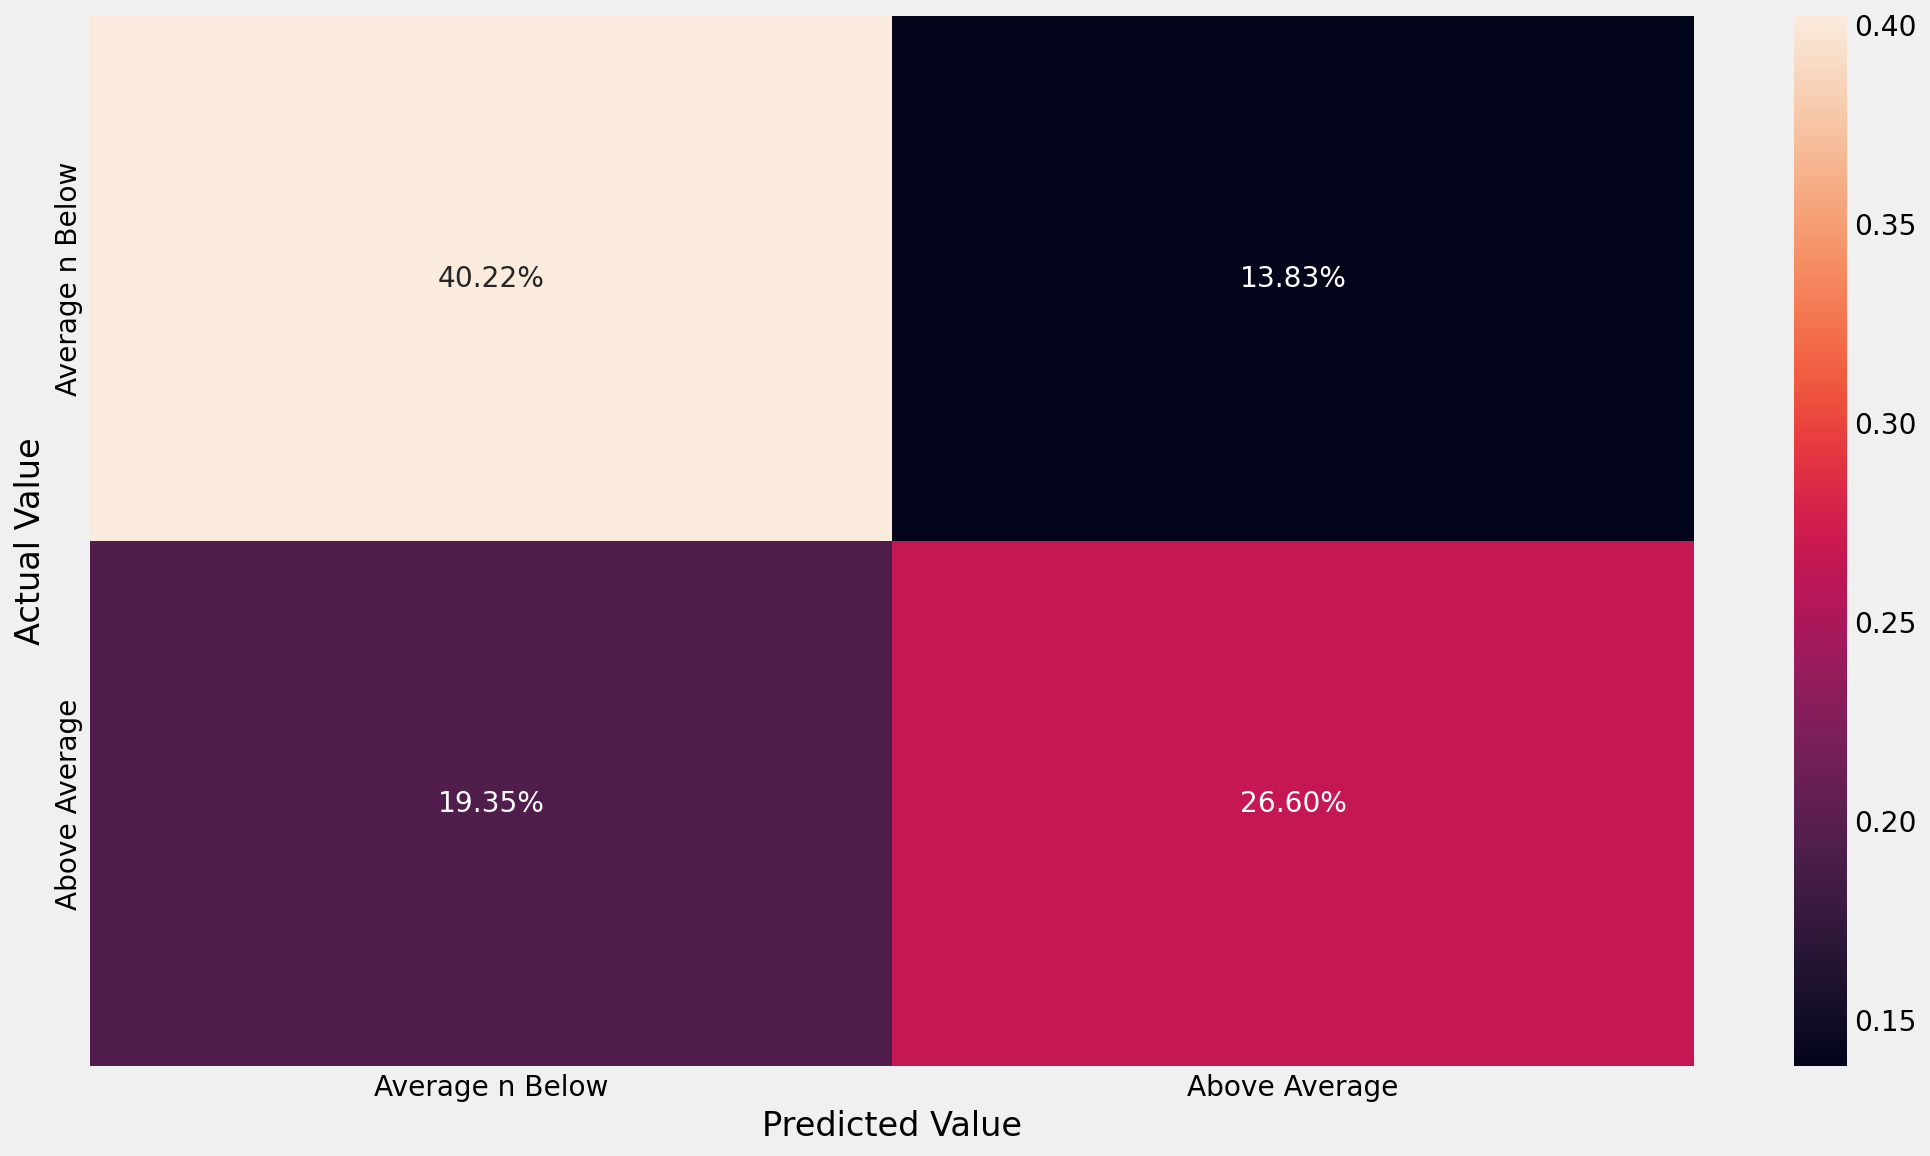

In [66]:
# Visualization the Confusion Matrix
sns.heatmap(metrics.confusion_matrix(y_test, predictions)/ len(y_test),
            annot=True, fmt='.2%', 
            xticklabels=['Average n Below', 'Above Average'], 
            yticklabels=['Average n Below', 'Above Average'])

plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

In [68]:
model_logreg.coef_

array([[ 1.59106917e-03, -1.60922705e+00,  5.68271130e-02,
         1.45124097e+00, -8.03409981e-02, -7.91939099e-04,
         1.63365993e-02, -3.29846781e-04,  1.30955845e-01,
         1.83543522e-01,  5.18246399e-02,  4.22399551e-01,
        -1.99922071e-01, -2.58435597e-01,  2.27170701e-02,
        -6.07216781e-02,  2.00042058e-01, -4.10688856e-02,
         9.12906954e-02, -8.81929177e-02,  1.79688558e-01,
         1.42428505e-01, -7.68402138e-03,  1.03203168e-01,
        -8.99723899e-02, -6.89644297e-02, -5.45964054e-02,
        -6.54184381e-02, -4.95539602e-01,  8.69388340e-02,
         9.46778328e-03,  1.08492595e-01, -3.22187252e-01,
         8.57188595e-02]])

## 4.1 Random Tree Forest 

In [67]:
from sklearn.ensemble import RandomForestClassifier

> Q: Complete the following cell

In [69]:
model_randtree = RandomForestClassifier(max_depth=7, min_samples_leaf=30)

# Train the model
model_randtree.fit(x_train, y_train)

# Generate predictions based on the test data set
predictions = model_randtree.predict(x_test)


# Generate Precision of the model
print(metrics.precision_score(y_test, predictions))

# Generate Recall of the model
print(metrics.recall_score(y_test, predictions))

0.7983295632503915
0.6442312192838755


Text(70.66, 0.5, 'Actual Value')

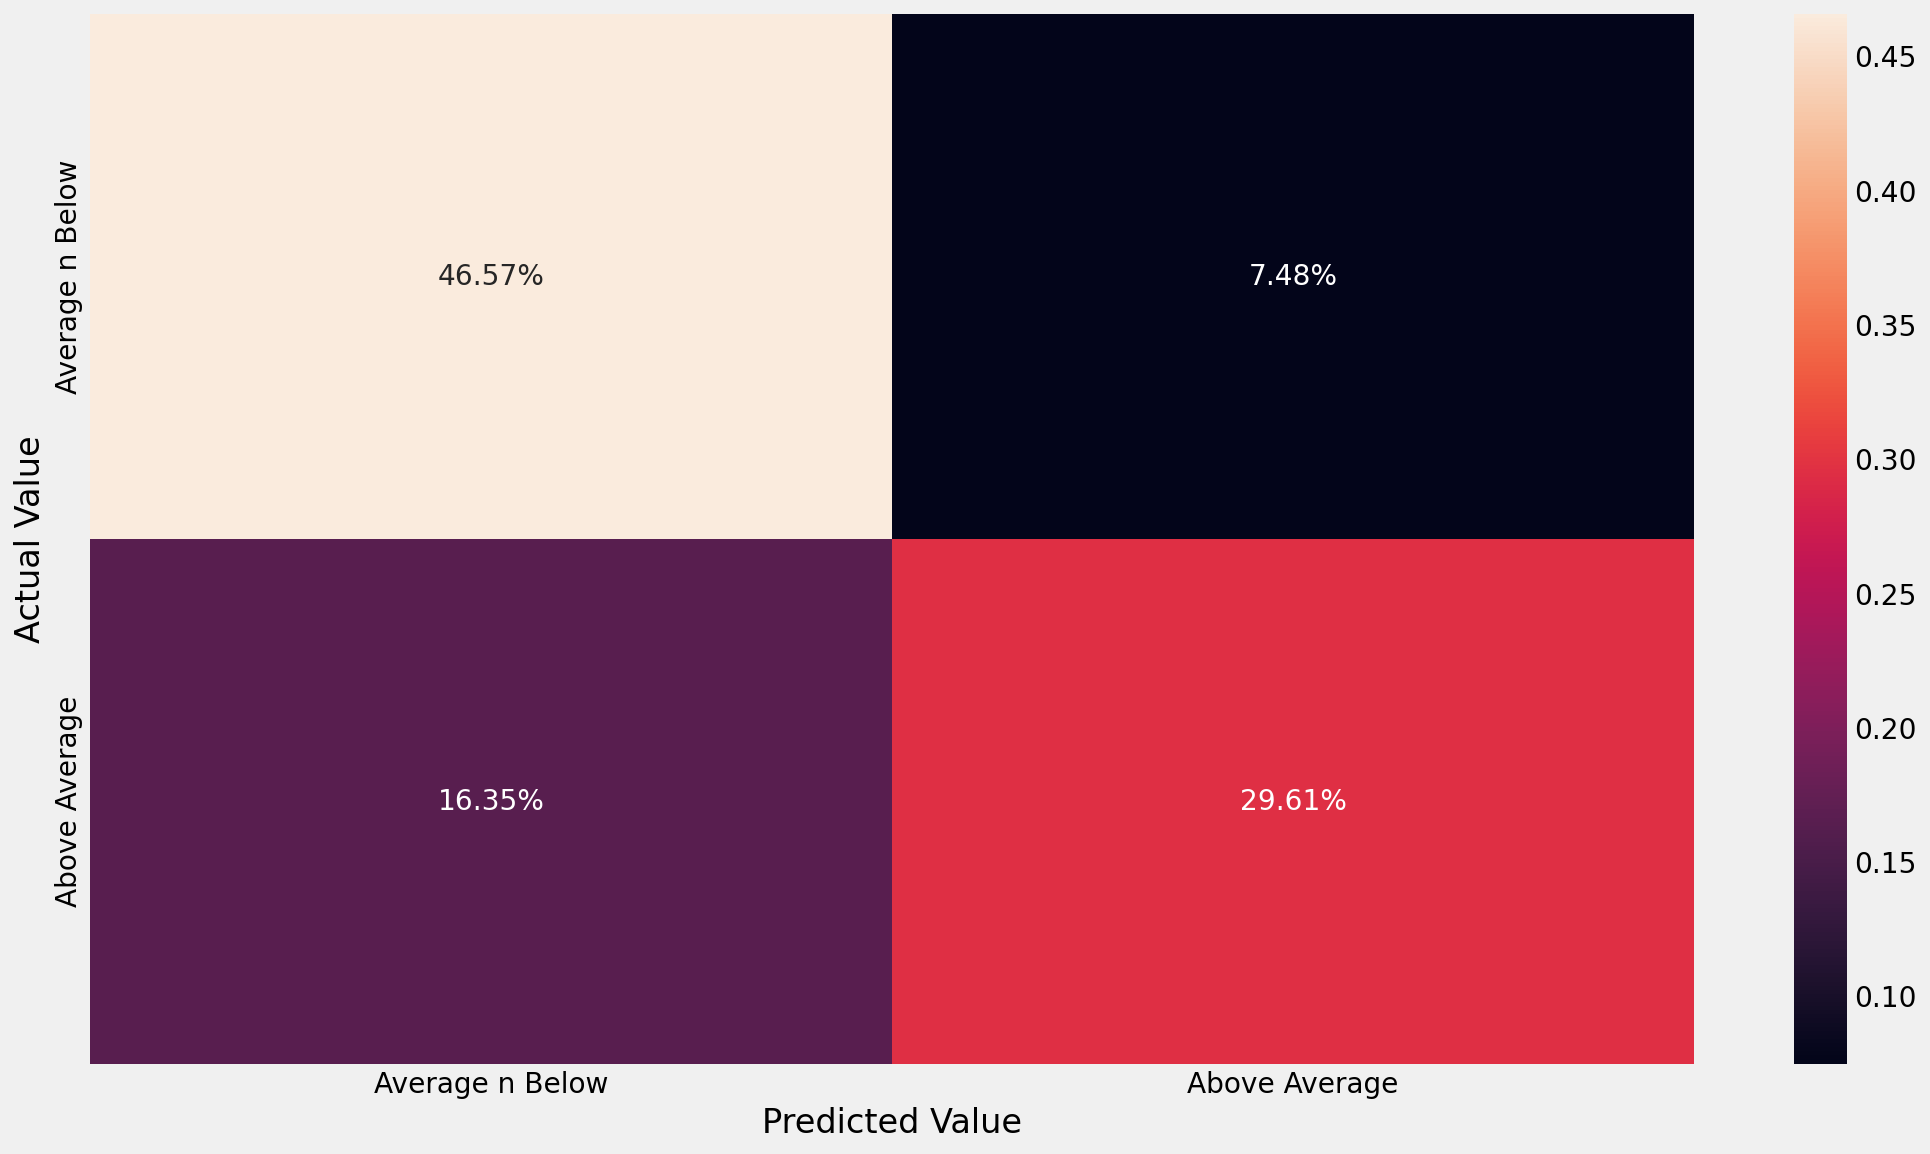

In [70]:
# Visualization the Confusion Matrix
sns.heatmap(metrics.confusion_matrix(y_test, predictions)/ len(y_test),
            annot=True, fmt='.2%', 
            xticklabels=['Average n Below', 'Above Average'], 
            yticklabels=['Average n Below', 'Above Average'])

plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

## 4.3 Your Model of Choice

### 4.3.1 Model A


🔷**TASK**
> Create a new model to predict **price_above_average** (whether or not the unit is sold both average price), <br>
> using any algorithmn of your choice (e.g. KNN, SVC, Random Forest). <br>
> Your model must have at least **12 numerical features**. and the use the following categorical columns: <br>
> - town
> - commercial
> - residential <br>

> Improved accuracy is great, but optional. <br>
> You can re-use any cell before this point for this task.<br> 
> Some codes are provided as below.

In [ ]:

features_category_additional = [
    'residential',
    'commercial'
]

In [ ]:
# Create Dummies Variables for All Categorical Variables

df_dummies = pd.get_dummies(df[features_category_additional], drop_first=True)

# Add the Dummies Variables to the main Data Frame
df = pd.concat([df, df_dummies], axis=1, sort=False)

In [ ]:
# Define your numerical features 
features_numeric = [
    'Tranc_Year',
    'flat_type_numerized',
    'floor_area_sqm',
    'storey_relative',
    'age_approx',
    'total_dwelling_units',
    'Mall_Nearest_Distance',
    'Mall_Within_1km',
    'Hawker_Nearest_Distance',
    'Hawker_Within_1km',
    'hawker_food_stalls',
    'hawker_market_stalls'
]

In [ ]:
features = features_numeric + list(df_dummies.columns)

In [ ]:
target = 'price_above_average'

In [ ]:
# Keep 25% of the data for testing
# Set random_state=2020
x_train, x_test, y_train, y_test = model_selection.train_test_split(df[features], df[target], test_size=.25, random_state=2020)

In [ ]:
# Import the model from Sklearn package
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_randtree = RandomForestClassifier(max_depth=7, min_samples_leaf=30)

# Train the model
model_randtree.fit(x_train, y_train)

# Generate predictions based on the test data set
predictions = model_randtree.predict(x_test)


# Generate Precision of the model
print(metrics.precision_score(y_test, predictions))

# Generate Recall of the model
print(metrics.recall_score(y_test, predictions))

In [ ]:
# Visualization the Confusion Matrix
sns.heatmap(metrics.confusion_matrix(y_test, predictions)/ len(y_test),
            annot=True, fmt='.2%', 
            xticklabels=['Below Average', 'Above AVerage'], 
            yticklabels=['Below Average', 'Above AVerage'])

plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

---

### 4.3.2. Model B


🔷**TASK**
> Create a model with the same set of features as above, to predict **price_above_80percentile**. <br>
> You may create more cells wherever you need to. <br>
> You may even read in the raw data if you think you want to start fresh and have messed up the **df**.

In [ ]:
features = features_numeric + list(df_dummies.columns)

In [ ]:
target = 'price_above_80percentile'

In [ ]:
# Keep 25% of the data for testing
# Set random_state=2020
x_train, x_test, y_train, y_test = model_selection.train_test_split(df[features], df[target], test_size=.25, random_state=2020)

In [ ]:
# Import the model from Sklearn package
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_randtree = RandomForestClassifier(max_depth=7, min_samples_leaf=30)

# Train the model
model_randtree.fit(x_train, y_train)

# Generate predictions based on the test data set
predictions = model_randtree.predict(x_test)


# Generate Precision of the model
print(metrics.precision_score(y_test, predictions))

# Generate Recall of the model
print(metrics.recall_score(y_test, predictions))

In [ ]:
# Visualization the Confusion Matrix
sns.heatmap(metrics.confusion_matrix(y_test, predictions)/ len(y_test),
            annot=True, fmt='.2%', 
            xticklabels=['Below Average', 'Above AVerage'], 
            yticklabels=['Below Average', 'Above AVerage'])

plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

# Extra Learning: Adjusting Prediction with Decision Threshold

- All of the below (until the end of this document) are OPTIONAL CONTENTS
- They will not be tested in capstone assignment or quiz
- There is no task needed to be submitted. They are codes for you to run through, understand, and playing the parameters for experimenting with the outputs

In [71]:
model_logreg = LogisticRegression(max_iter=1000) # <-- reduce this number 

# Train the model
model_logreg.fit(x_train, y_train)

# Generate predictions based on the test data set
predictions = model_logreg.predict(x_test)


# Generate Precision of the model
print(metrics.precision_score(y_test, predictions))

# Generate Recall of the model
print(metrics.recall_score(y_test, predictions))

0.6579591402426048
0.5788439035806225


In [72]:
predictions

array([ True, False, False, ..., False,  True,  True])

In [76]:
probability_of_above_average = model_logreg.predict_proba(x_test)
df_proba = pd.DataFrame(probability_of_above_average, columns=['Negative', 'Positive'])

In [77]:
df_proba

,Negative,Positive
0,0.163813,0.836187
1,0.568527,0.431473
2,0.912544,0.087456
3,0.852757,0.147243
4,0.153192,0.846808
...,...,...
46487,0.419309,0.580691
46488,0.555531,0.444469
46489,0.654447,0.345553
46490,0.258955,0.741045


In [78]:
# Add a column containing the 'binary' (1/0) predictions that we generated earlier on
df_proba['Prediction'] = predictions

In [79]:
# Observe the predictions
# Note that only those of which its "Positive" is above 0.5 are predicted as True (above the average)
df_proba

,Negative,Positive,Prediction
0,0.163813,0.836187,True
1,0.568527,0.431473,False
2,0.912544,0.087456,False
3,0.852757,0.147243,False
4,0.153192,0.846808,True
...,...,...,...
46487,0.419309,0.580691,True
46488,0.555531,0.444469,False
46489,0.654447,0.345553,False
46490,0.258955,0.741045,True


Text(70.66, 0.5, 'Actual Value')

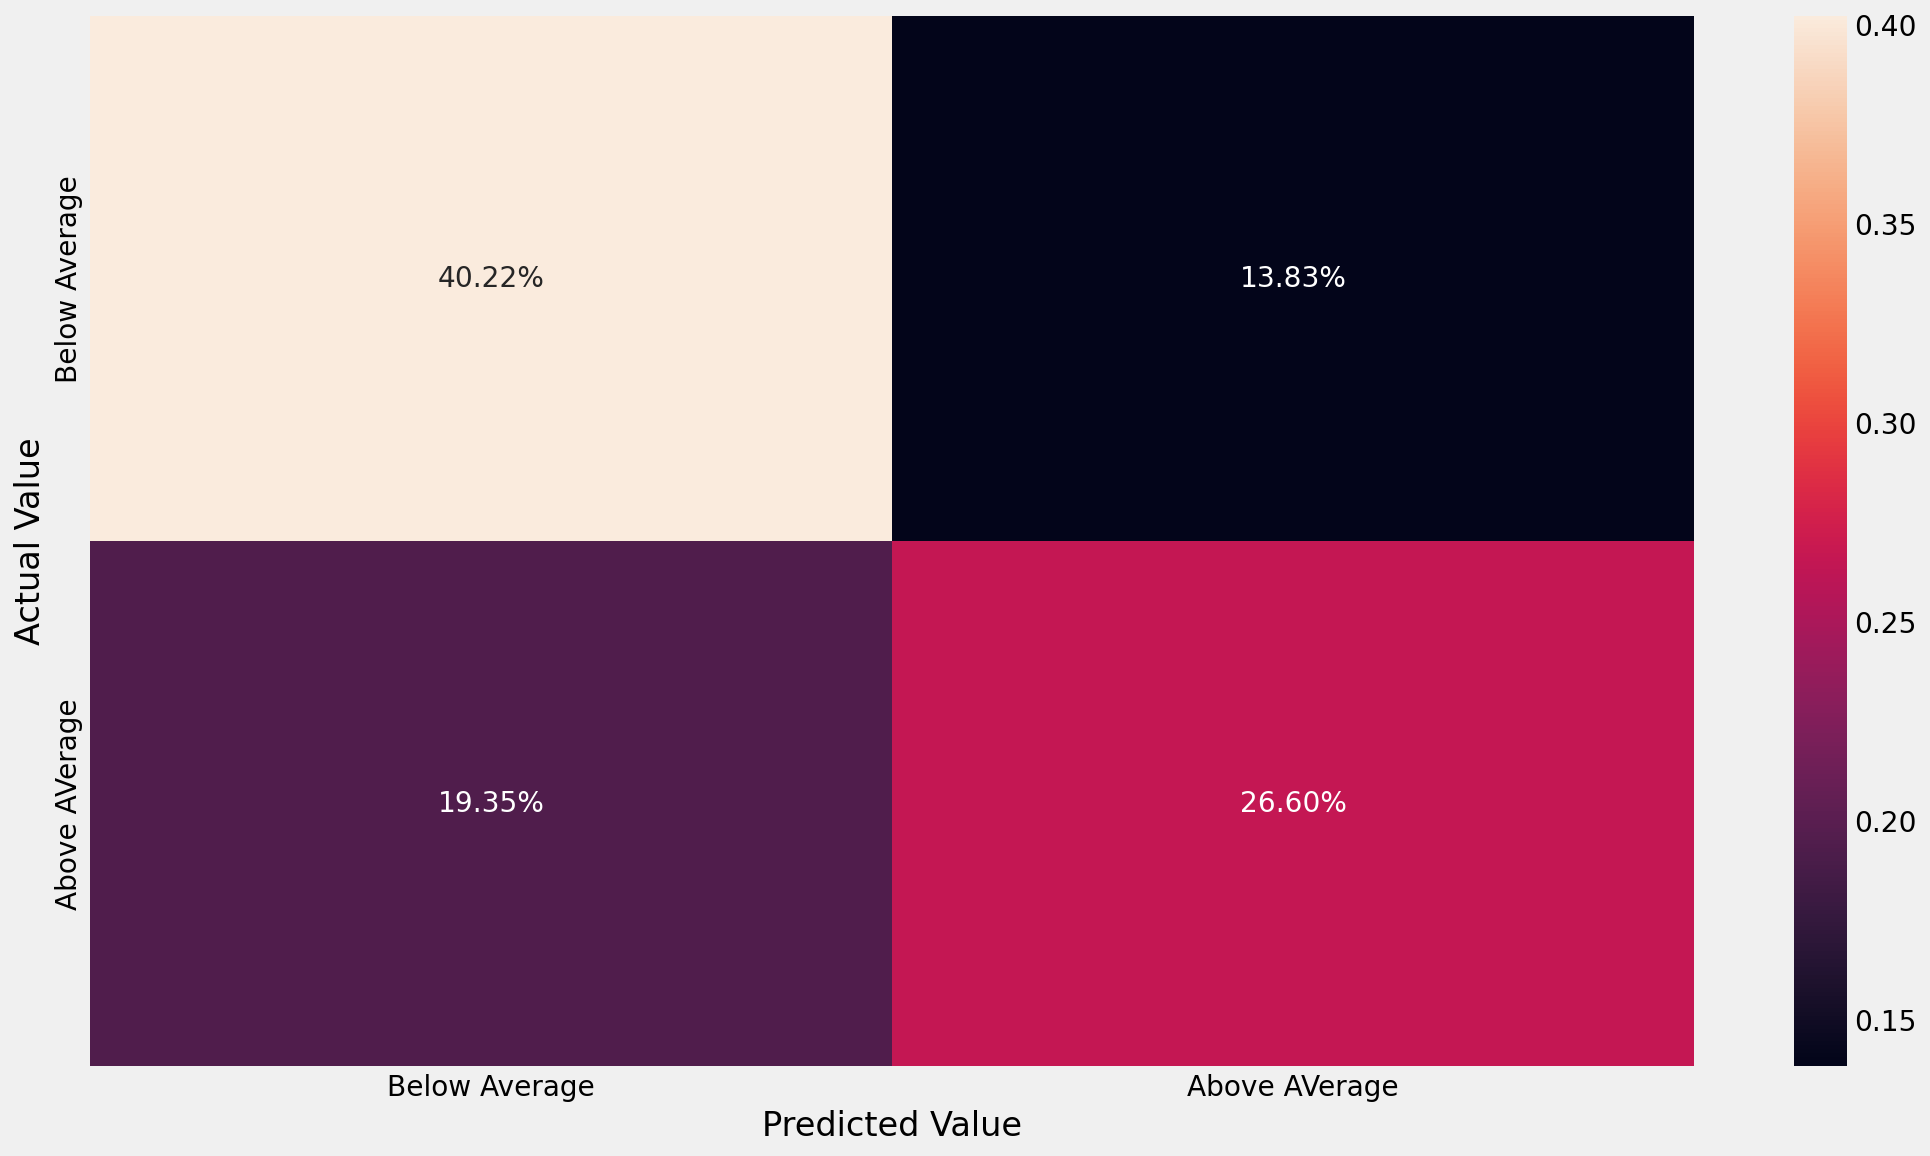

In [80]:
# Visualization the Confusion Matrix
sns.heatmap(metrics.confusion_matrix(y_test, predictions)/ len(y_test),
            annot=True, fmt='.2%', 
            xticklabels=['Below Average', 'Above AVerage'], 
            yticklabels=['Below Average', 'Above AVerage'])

plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

<AxesSubplot:>

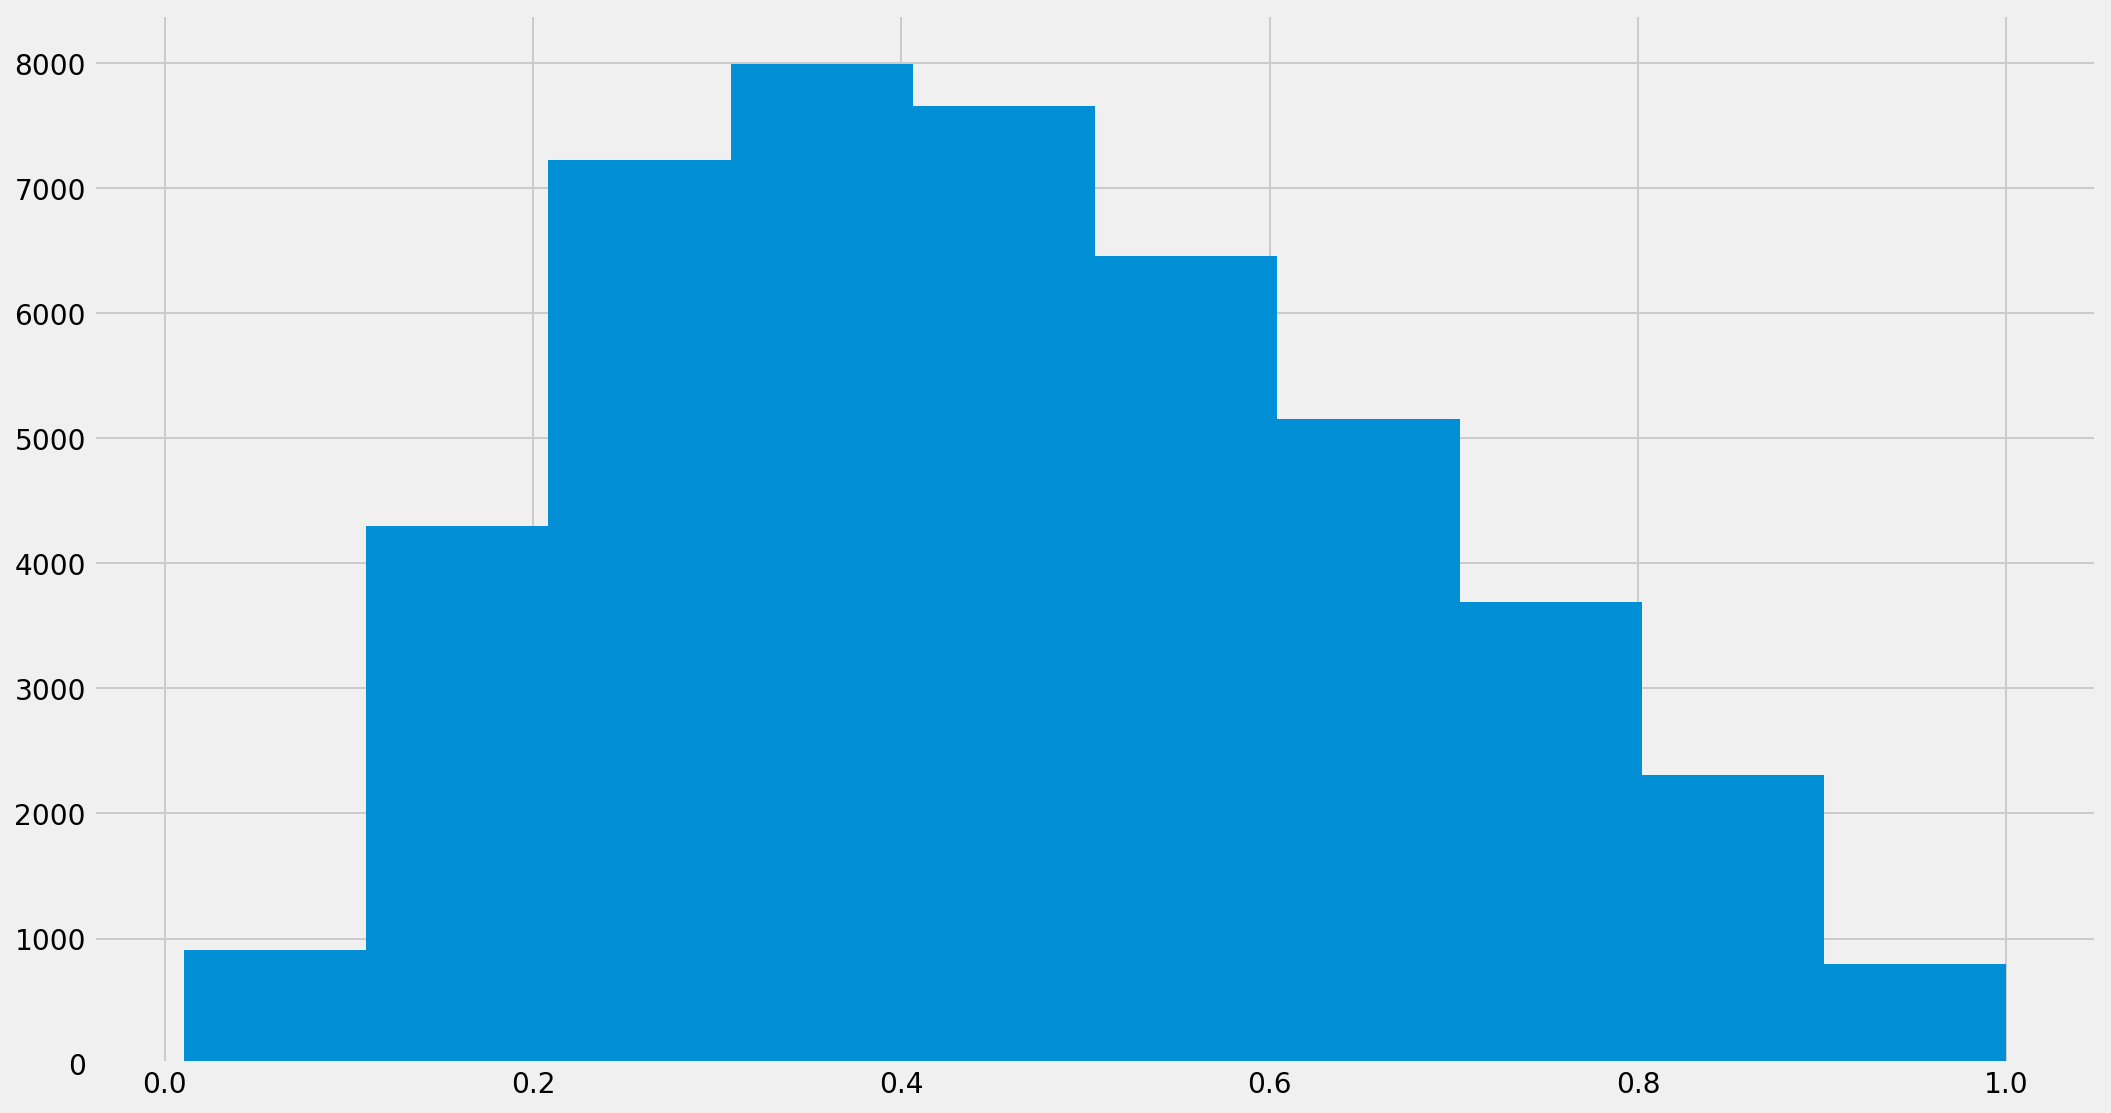

In [81]:
df_proba['Positive'].hist()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Positive', ylabel='Density'>

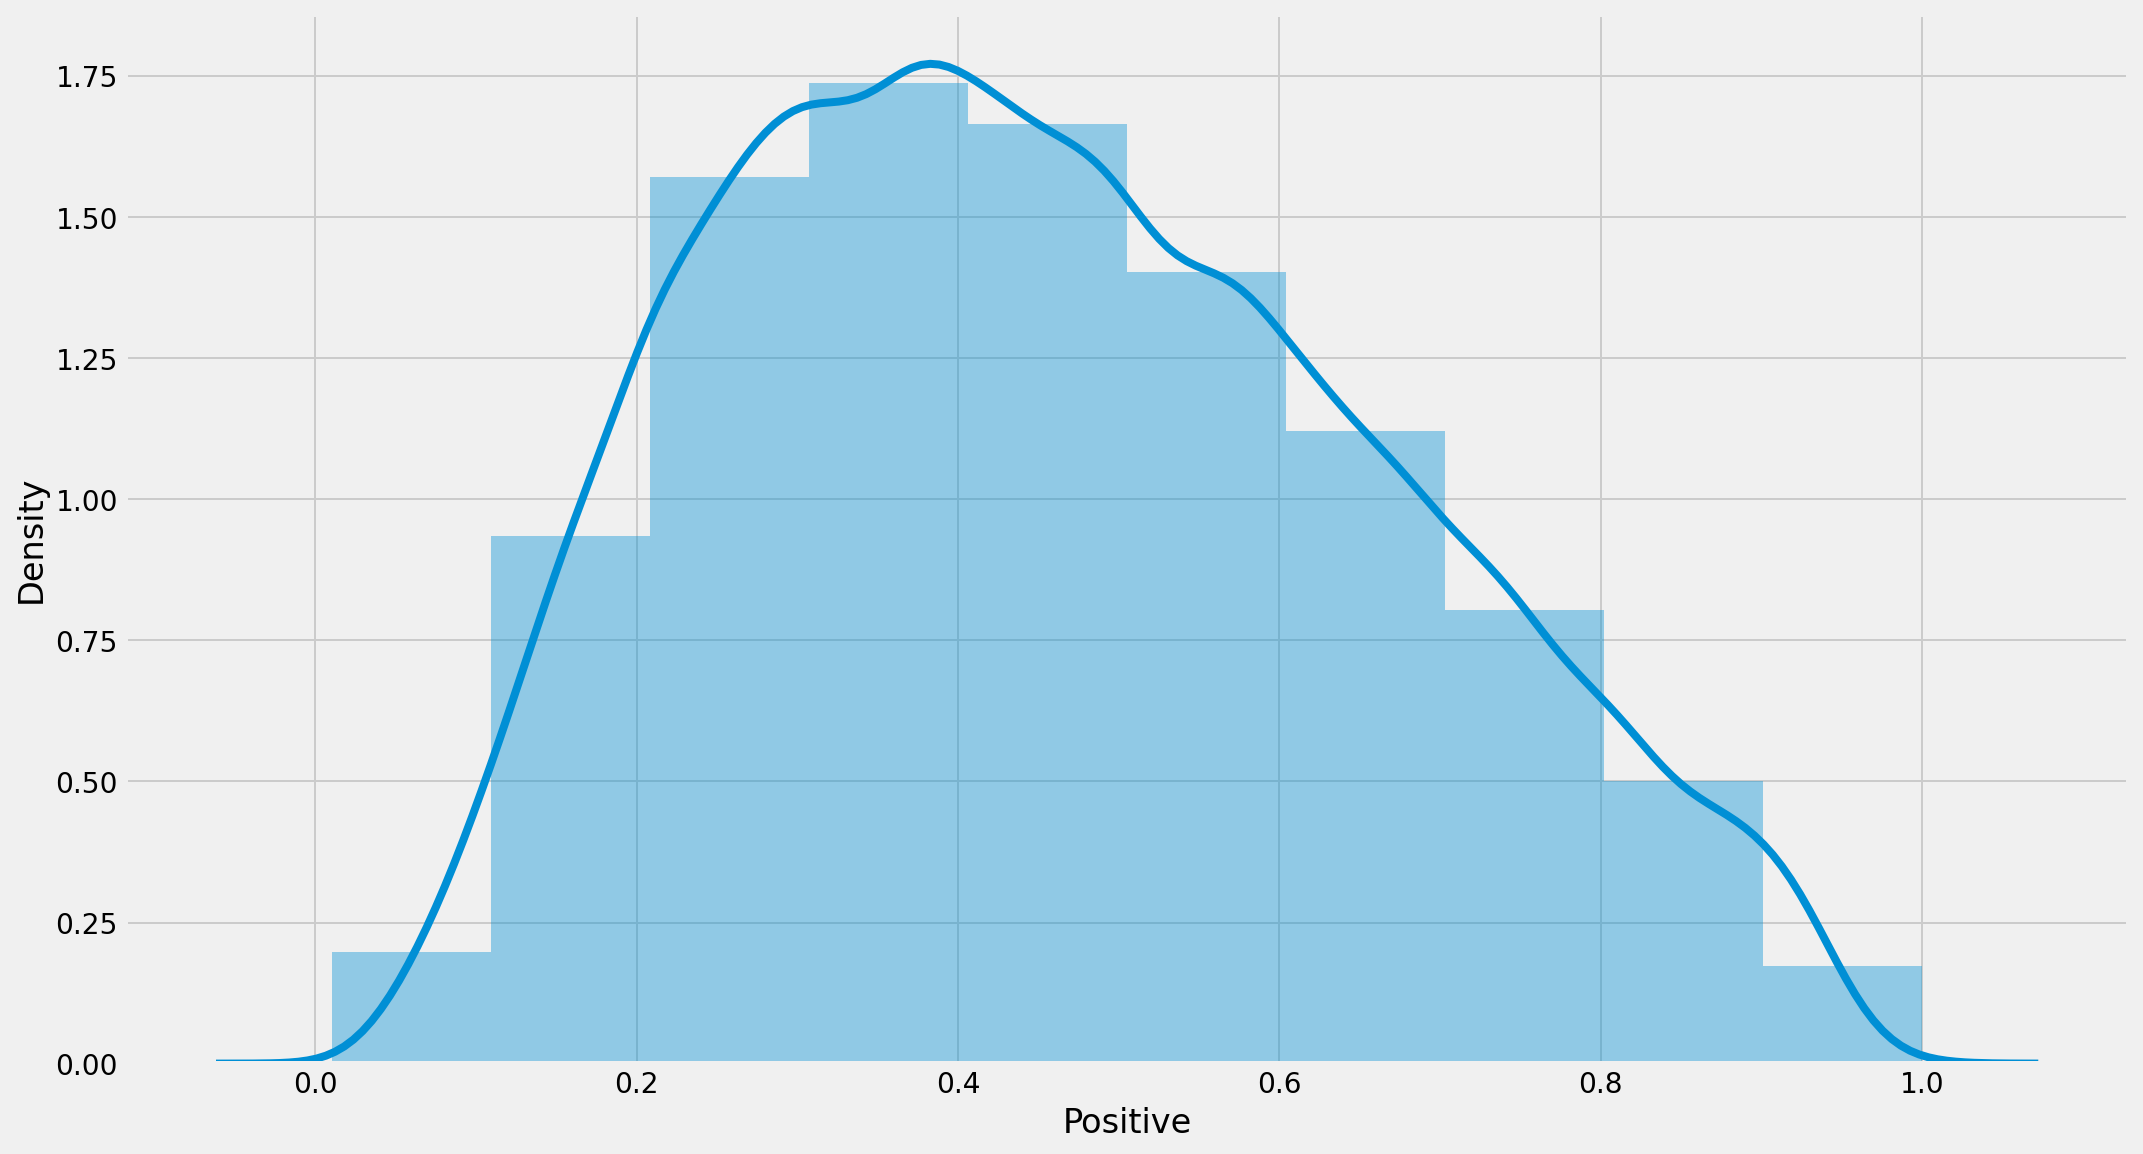

In [82]:
# Visualize the distribution of the probability of being positive (above average)
sns.distplot(df_proba['Positive'], bins=10)

#### Setting the Decision Threshold and Re-generate the Predictions (binary)

In [85]:
# With this, even if the data row has 11% or above being positive, it will be classified as positive

# predictions_adjusted = df_proba['Positive'] > decision_threshold
decision_threshold = 0.10
df_proba['predictions_adjusted'] = df_proba['Positive'] > decision_threshold

In [86]:
df_proba['predictions_adjusted'] = predictions_adjusted

In [89]:
df_proba

,Negative,Positive,Prediction,predictions_adjusted
0,0.163813,0.836187,True,True
1,0.568527,0.431473,False,True
2,0.912544,0.087456,False,False
3,0.852757,0.147243,False,True
4,0.153192,0.846808,True,True
...,...,...,...,...
46487,0.419309,0.580691,True,True
46488,0.555531,0.444469,False,True
46489,0.654447,0.345553,False,True
46490,0.258955,0.741045,True,True


Text(70.66, 0.5, 'Actual Value')

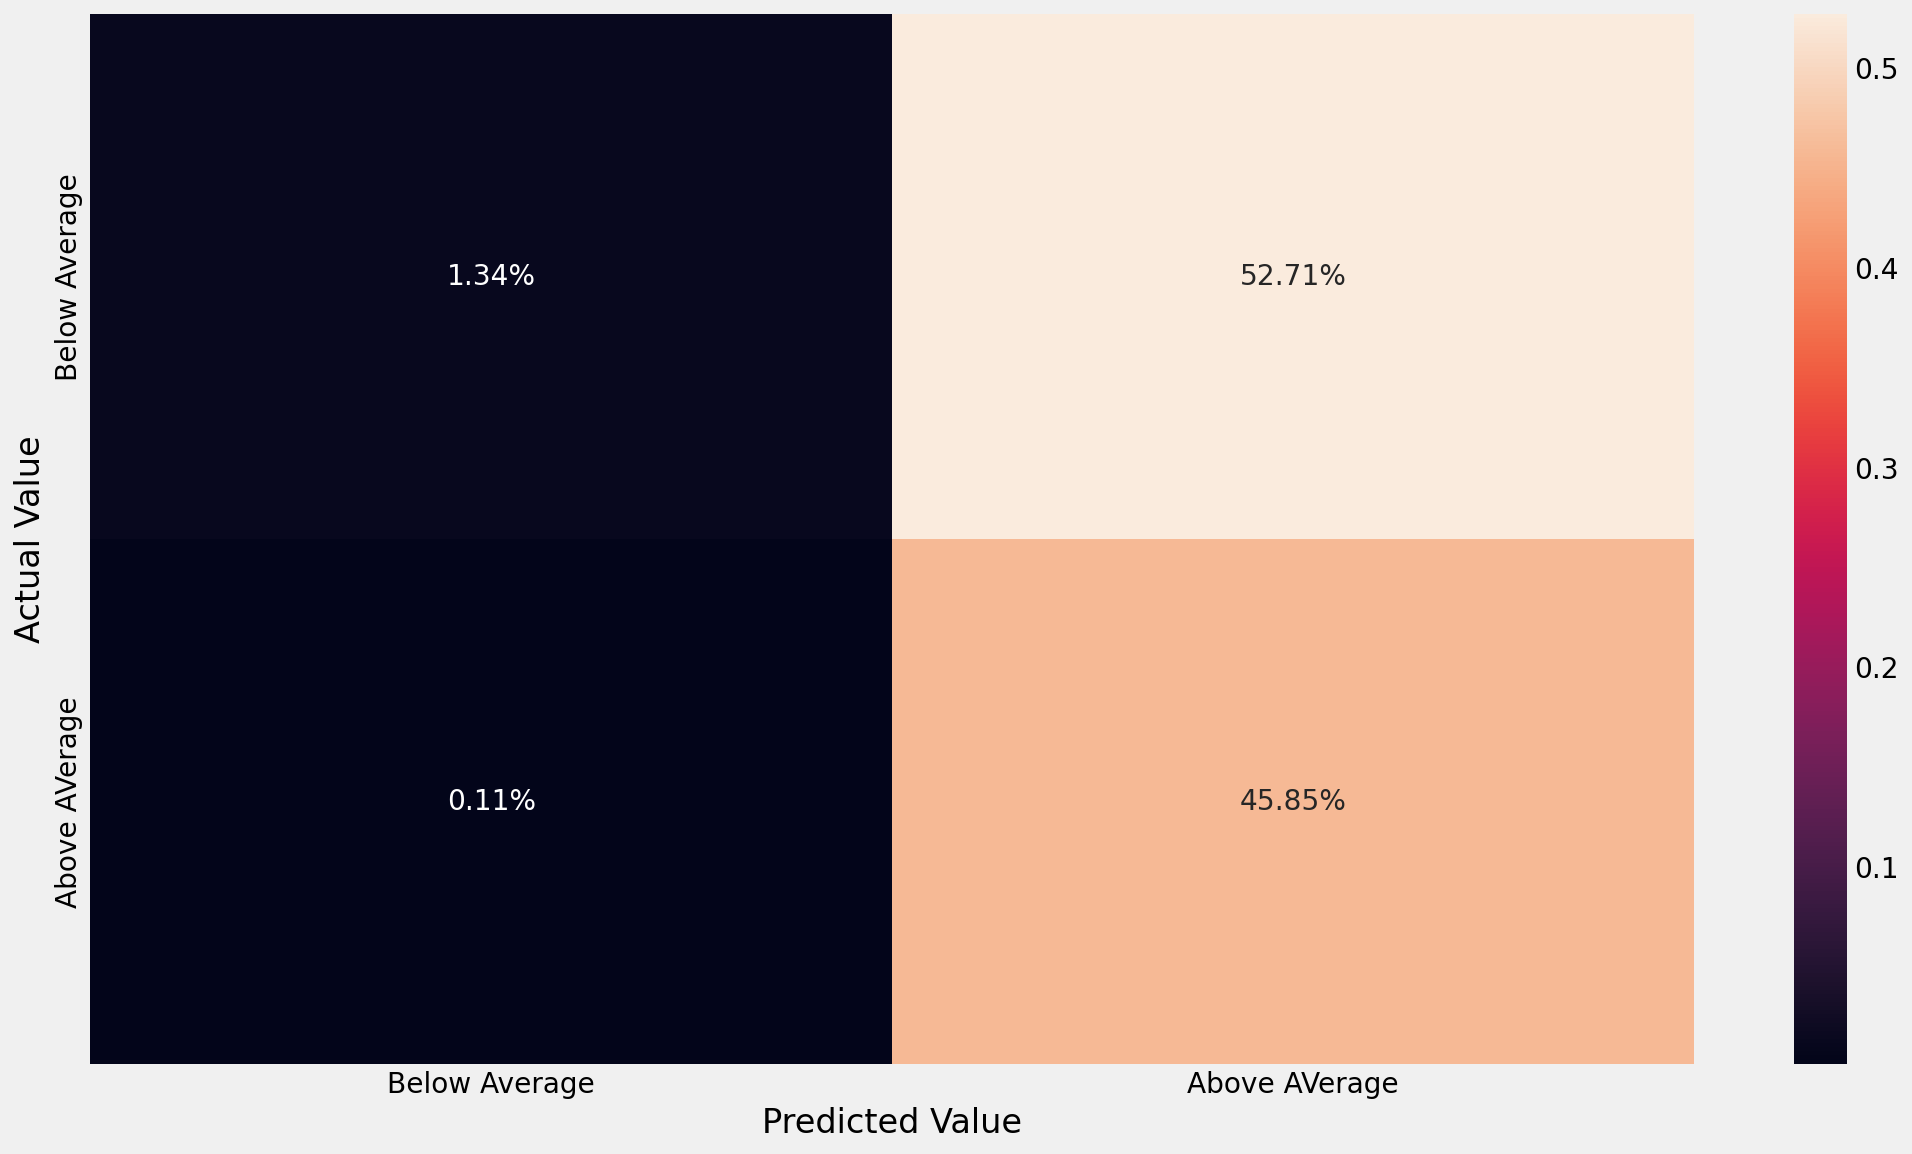

In [90]:
# Visualization the Confusion Matrix
sns.heatmap(metrics.confusion_matrix(y_test, predictions_adjusted)/ len(y_test),
            annot=True, fmt='.2%', 
            xticklabels=['Below Average', 'Above AVerage'], 
            yticklabels=['Below Average', 'Above AVerage'])

plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

> The following function named 'precision_and_recal', \
> take in  1 input parameter, which is a list of decision threshold [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]\
> and to print the precision and recall value for each of the decision thresholds

In [91]:
def precision_and_recal(thresholds):
    for t in thresholds:
        predictions_adjusted = df_proba['Positive'] > t
        precision = metrics.precision_score(y_test, predictions_adjusted)
        recall = metrics.recall_score(y_test, predictions_adjusted)
        print('At Threshold {:.4f}, Precision = {:.4f} | Recall = {:.4f}'.format(t, precision, recall))
        
precision_and_recal([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

At Threshold 0.1000, Precision = 0.4652 | Recall = 0.9977
At Threshold 0.2000, Precision = 0.4917 | Recall = 0.9617
At Threshold 0.3000, Precision = 0.5386 | Recall = 0.8733
At Threshold 0.4000, Precision = 0.5946 | Recall = 0.7383
At Threshold 0.5000, Precision = 0.6580 | Recall = 0.5788
At Threshold 0.6000, Precision = 0.7307 | Recall = 0.4173
At Threshold 0.7000, Precision = 0.8172 | Recall = 0.2652
At Threshold 0.8000, Precision = 0.9205 | Recall = 0.1360
At Threshold 0.9000, Precision = 0.9692 | Recall = 0.0368


#### Visualize the Effect of the Precision-Recall Trade Off

In [92]:
precision, recall, threshold = metrics.precision_recall_curve(y_test, df_proba['Positive'])

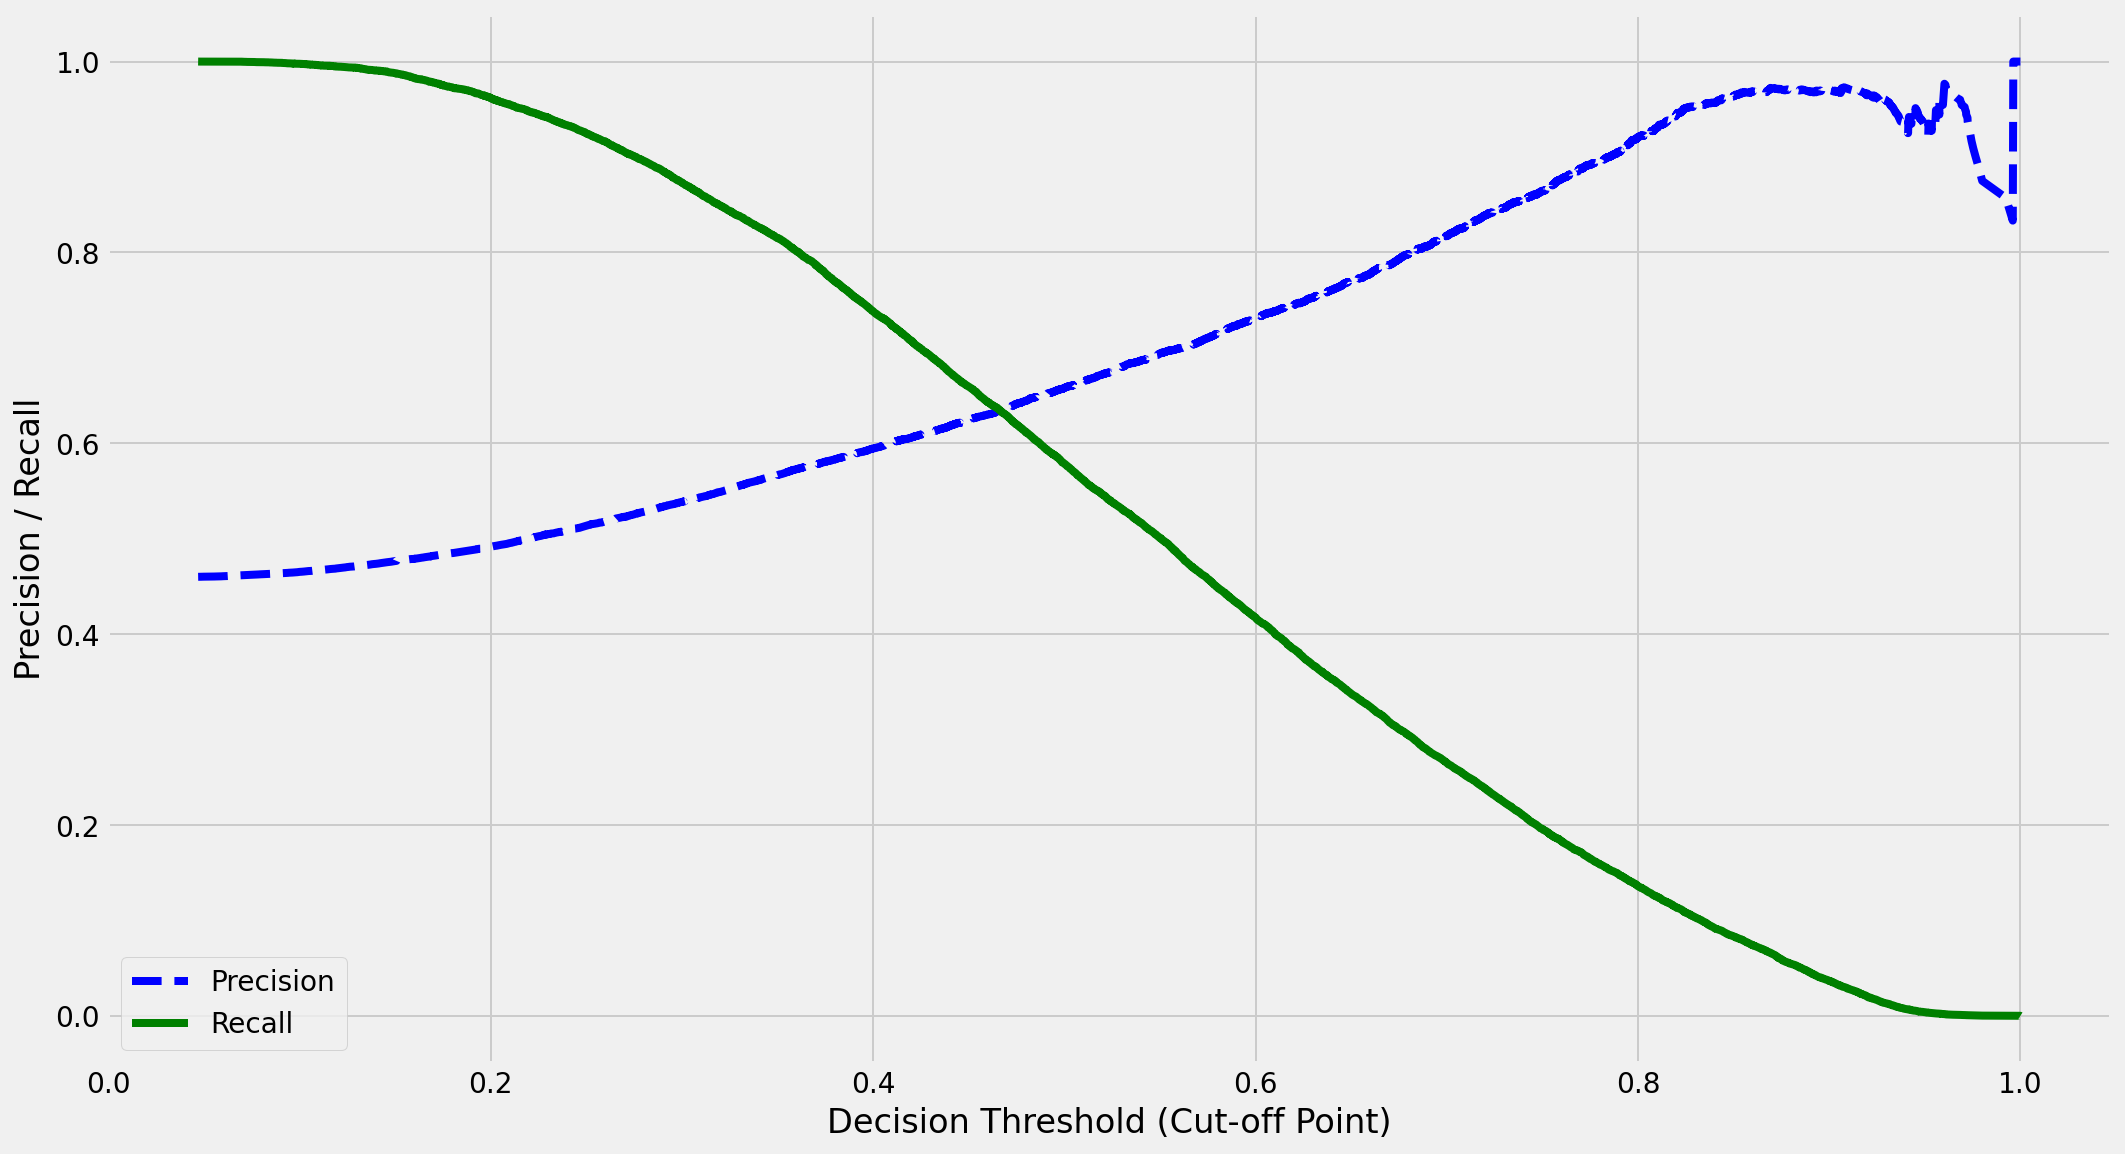

In [93]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): 
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision") 
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall") # highlight the threshold and add the legend, axis label, and grid
    plt.legend()
    plt.xlabel('Decision Threshold (Cut-off Point)')
    plt.ylabel('Precision / Recall')
plot_precision_recall_vs_threshold(precision, recall, threshold)

In [94]:
from joblib import dump, load

In [97]:
# Saving a model
dump(model_logreg, 'model_logisticRegression.dump')

['model_logisticRegression.dump']

In [98]:
# Loading a model
model = load('model_logisticRegression.dump')

In [ ]:
model.predict()

# Appendix: Template Codes for "Standardizing the Features"

---
## When it's benefiical to use 'StandardScaler'
- Before K-Nearest Neighbor (KNN)
- Before Support Vector Machine (SVM)
- Before Clustering (K-Mean)

## Example Codes

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Transform the numerical features and store into the new variable 'arrays_of_transformed_values'
std_scaler = StandardScaler()
arrays_of_transformed_values = std_scaler.fit_transform(df[features_numeric])

# Convert the new variable into Data Frame with the column names
df_transformed_values = pd.DataFrame(arrays_of_transformed_values)

# Create Column Names, so that now each column is '[original_colname] + _std'
# For example, 'age' -> 'age_std'
new_colnames = [str(c) + '_std' for c in features_numeric]

# Assign the new column names
df_transformed_values.columns = new_colnames

df = pd.concat([df, df_transformed_values], axis=1, sort=False)

---

## Demystifying "Standard Scaler "

> Replicating the StandardScaler without using package (For your info: What StandardScaler does)

In [ ]:
list_of_transformed_values = []

for col in features_numeric:
    mean = df[col].mean()
    std = df[col].std()
    
    newcol =  (df[col] - mean) / std
    list_of_transformed_values.append(newcol)

    
df_manual = pd.DataFrame(list_of_transformed_values)
df_manual = df_manual.transpose()
df_manual.head(10)